# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [19]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


Text(0, 0.5, 'Salary')

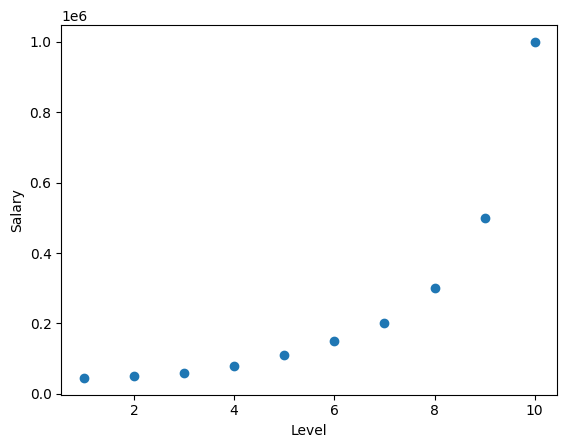

In [20]:
data=pd.read_csv("Position_Salaries.csv")
print(data.head())
x=data['Level'].values
y=data['Salary'].values
plt.scatter(x,y)
plt.xlabel('Level')
plt.ylabel('Salary')


### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * Yes
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * A simple linear regression model fits this data as this model can employed to any dataset with two variables such as 'Level' and 'Salary', assumes a linear relationship between the variables.Since visualization from the EDA (scatter plot) can verify this.
Secondly, from the above 'Salary Distribution by Level' plot, it is clear that the relationship is not perfectly linear, it is like a curve. Therefore, a simple linear model might not capture the true relationship between 'Level' and 'Salary'.



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= 1/n * \sum((y_i - (w_1 * x_i^2 + w_2 * x_i + b))^2)$$

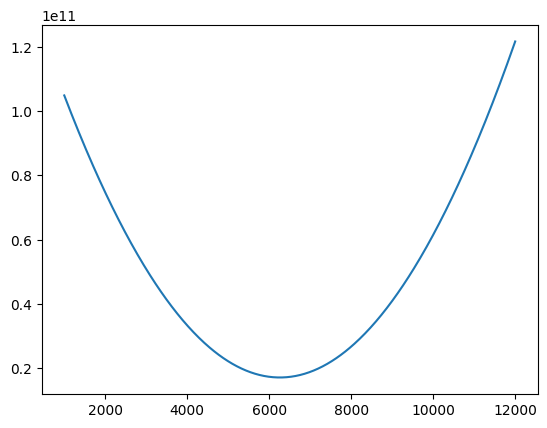

In [21]:
# your code to plot the cost function (if required)
w = 1000
b = 2861
g = 1000
N = x.size
MSE = 1/N*np.sum((((g*x*x)+(w*x)+b)-y)**2)
w = np.linspace(1000, 12000, 500)
g = np.linspace(1000, 12000, 500)
MSE =np.empty(w.shape)
for i in range(500):
  MSE[i] = 1/N*np.sum(((np.dot(x,w[i])+np.dot((x*x),g[i])+b)-y)**2)

plt.plot(w,MSE)

# By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes

* Explain why you said yes or no to the above questions.
> * Mean squared error (MSE) is a commonly used cost function for regression problems, including those involving second-order models. It calculates the average of the squared differences between the predicted values and the true values. Since it can be also used effectively as the cost function for training the second-order model using gradient descent.

**Derivatives of cost function:**
$$ \frac{\partial MSE}{\partial w} = \frac{2}{N} \sum_{i=1}^N \left( wx_i^2 + bx_i - y_i x_i \right) $$

$$ \frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left( wx_i + b - y_i \right) $$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$w = w -\alpha \frac{d}{dw}MSE(w,b) $$
$$b = b -\alpha \frac{d}{dw}MSE(w,b) $$


## Implementation of the model

The value of w, b, c after 30000 iterations: -32754.000965275063 -2573.366927421129 11043.17469106842


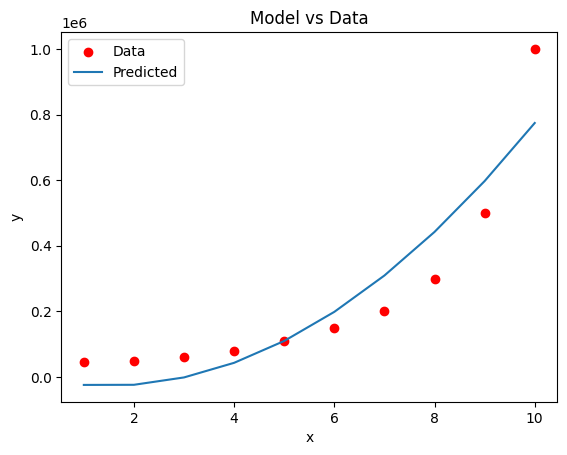

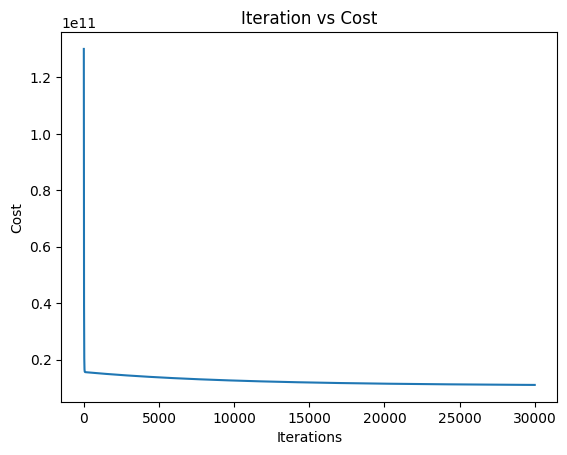

Predicted output for input 7.5 : 372950.2
Calculated R-squared: 0.8632381438663573


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data

data=pd.read_csv("Position_Salaries.csv")
#print(data.head())
x=data['Level'].values
y=data['Salary'].values

# Write a code/ function to do the following

# Function for your model
def poly_reg(x, w, g, b):
    P = (g*(x**2)) + (w*x) + b
    return P

N = x.size

# Function for your cost function
def cost(x, y, w, g, b):
    MSE = (1/N) * np.sum((((g*x*x) + (w*x) + b) - y)**2)
    return MSE

# Function to calculate the derivatives
def gradients(x, y, w, b, g):
    dw = (2/N) * np.sum((((g*x**2) + (w*x) + b) - y) * x)
    dg = (2/N) * np.sum((((g*x**2) + (w*x) + b) - y) * (x**2))
    db = (2/N) * np.sum(((g*x**2) + (w*x) + b) - y)
    return dw, dg, db

# Code to estimate the parameters using gradient descent
alpha = 0.00001  # learning_rate
g = 1
w = 1
b = 2
M = 30000   # iterations
cost_lst = []

for i in range(M):
    dw, dg, db = gradients(x, y, w, b, g)
    w -= alpha * dw
    g -= alpha * dg
    b -= alpha * db
    cost_lst.append(cost(x, y, w, g, b))

print('The value of w, b, c after', M, 'iterations:', w, b, g)
y_pred = poly_reg(x, w, g, b)

# Plot the model with the data given
plt.scatter(x, y, color='red', label='Data')
plt.plot(x, y_pred, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs Data')
plt.legend()
plt.show()

# Plot the iteration VS cost
plt.plot(range(M), cost_lst)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Iteration vs Cost')
plt.show()

# Function to predict output for a given input
def predict_output(input_value, w, b, g):
    output = poly_reg(input_value, w, g, b)
    return output

# Given input value for prediction
input_value = 7.5

# Predict output for the given input value
predicted_output = predict_output(input_value, w, b, g)
print("Predicted output for input", input_value, ":", round(predicted_output, 2))

# Estimate the model performance (R-squared)
y_mean = np.mean(y)
SST = np.sum((y - y_mean) ** 2)
SSE = np.sum((y - y_pred) ** 2)
if SST != 0:
    r2 = 1 - (SSE / SST)
else:
    r2 = []

print("Calculated R-squared:", r2)


### Answer the following

* What is learning rate?
> * The learning rate is a hyperparameter that controls the size of the steps taken during the optimization process, such as gradient descent, when updating the parameters of a model. It determines how much the parameters are adjusted in the direction opposite to the gradient of the loss function with respect to the parameters.

* What will happen if the learning rate is too large?
> * If the learning rate is too large, the optimization process may overshoot the minimum, leading to oscillations or divergence, ultimately causing the loss function to increase instead of decrease.

* What will happen if the learning rate is too small?
> * If the learning rate is too small in a machine learning optimization algorithm such as gradient descent, the training process may converge very slowly

* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Modify the second-order model function to accommodate the third-order model.
> * Update the compute gradients function to compute derivatives for the third-order model.
> * Initialize the parameters for the third-order model in the gradient descent function, includes introducing a new parameter
> * Update the parameter update step in the gradient descent function to include the adjustment of the parameter
> * Visualize the predictions of the third-order model.

